# Fakultät für Physik

## Physikalisches Praktikum P2 für Studierende der Physik

Versuch P2-63, 64, 65 (Stand: April 2024)

[Raum F1-08](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P2.png)



# Photoeffekt

Name: __________________ Vorname: __________________ E-Mail: __________________

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Name: __________________ Vorname: __________________ E-Mail: __________________

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: _____

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: __________________

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: __________________

---

**Beanstandungen:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

# Durchführung

**Die Anleitung zu diesem Versuch finden Sie [hier](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Photoeffekt/README.md).**

In [45]:
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt
import kafe2

## Aufgabe 1: Grundlagen

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Photoeffekt/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Machen Sie sich mit dem zu untersuchenden Effekt und der Art, wie Sie ihn beobachten und messen werden vertraut. 
 * Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 1.1: Qualitative Beobachtung des äußeren photoelektrischen Effekts

Beobachten Sie den äußeren Photoeffekt mit Hilfe des bereitstehenden statischen Elektrometers (E), der $\mathrm{Zn}$-Platte (Zn) und der $\mathrm{Hg}$-Dampflampe (Hg) qualitativ. Gehen Sie dabei wie folgt vor: 

 * Laden Sie Zn negativ auf und beobachten, Sie E ohne Zn mit Hg zu bestrahlen. 
 * Laden Sie Zn negativ auf und beobachten, Sie E, wenn Sie Zn mit Hg bestrahlen.
 * Laden Sie Zn negativ auf und beobachten, Sie E, wenn Sie Zn mit Hg bestrahlen und zusätzlich eine positiv geladene Elektrode in die Nähe von Zn bringen.
 * Laden Sie Zn positiv auf und beobachten, Sie E, wenn Sie Zn mit Hg bestrahlen.

Beschreiben und erklären Sie Ihre Beobachtungen. 

---

**Lösung:**

*Fügen Sie Ihre Lösung zu dieser Aufgabe hier ein. Löschen Sie hierzu diesen kursiv gestellten Text aus dem Dokument. Um Code-Fragmente und Skripte in [Python](https://www.python.org/), sowie ggf. bildliche Darstellungen direkt ins [Jupyter notebook](https://jupyter.org/) einzubinden fügen Sie dem notebook eine Code-Zelle zu.* 

---

### Aufgabe 1.2: Charakterisierung des für die folgenden Aufgaben zu verwendenden Elektrometers

 * Nehmen Sie einen Nullabgleich des für **Aufgabe 2** zu verwendenden Elektrometers vor. 
 * Bestimmen Sie den Innenwiderstand $R_{i}$ des Elektrometers mit Hilfe der vorhandenen Vorwiderstände von $R_{V}=0.1,\, 1$ und $10\,\mathrm{G\Omega}$. 

---

/Users/raphaelmutter/miniconda3/lib/python3.11/site-packages/kafe2/fit/_base/fit.py:1048: UserWarning: No data/model errors were specified. Parameter errors cannot be calculated.
  warnings.warn("No data/model errors were specified. Parameter errors cannot be calculated.")


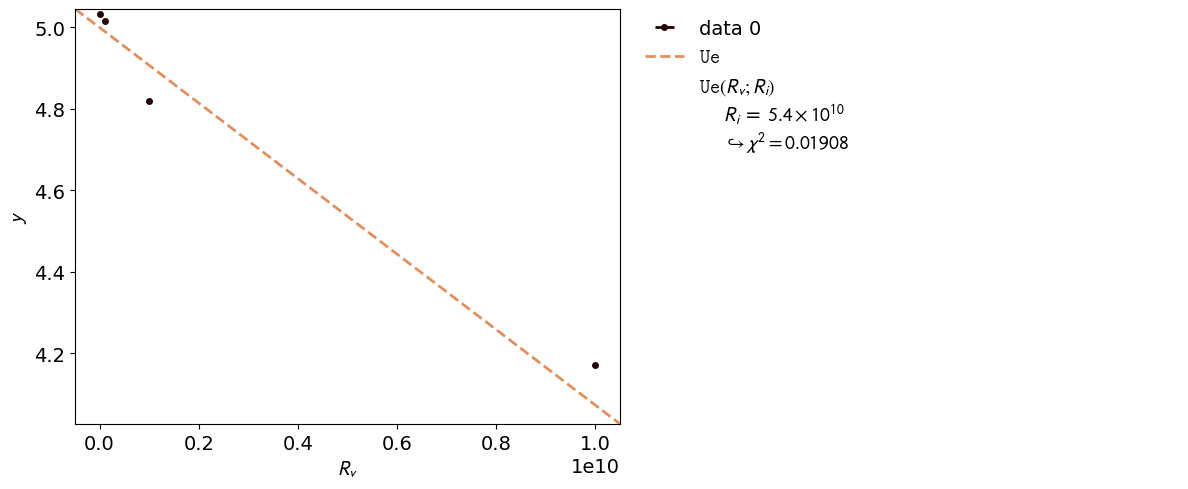

In [58]:
Rs = np.array([[10,5.034],[100,5.016],[1000,4.820],[10000,4.170]]) #[MOhm,Volt]
Rs[:,0] *= 1e6
U_0 = 5

def Ue(R_v,R_i):
    return U_0*(1-R_v/R_i)

fit = kafe2.xy_fit(Ue,Rs[:,0],Rs[:,1])
kafe2.plot()

## Aufgabe 2: Bestimmung von $h$

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Photoeffekt/doc/Hinweise-Versuchsdurchfuehrung.md).**

 - Bestimmen Sie $h$ aus dem äußeren photoelektrischen Effekt mit Hilfe von zwei verschiedenen Schaltungen. 
 - Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 2.1: Spannung $U_{\mathrm{Ph}}$ der Photozelle bei variierender Lichtfrequenz

 * Tragen Sie die sich von selbst einstellende maximale Spannung $U_{\mathrm{Ph}}$ der Photozelle bei Bestrahlung mit Licht der Wellenlängen $\lambda_{\mathrm{CWL}}^{(i)}$ bei maximaler Lichtintensivität auf. 
 * Verwenden Sie die folgenden sechs Wellenlängen der zur Verfügung stehenden Filter: $\lambda_{\mathrm{CWL}}^{(i)} = 360,\,400,\,440,\,490,\,540,\,590\,\mathrm{nm}$.
 * Bestimmen Sie $h$ durch Anpassung eines geeigneten Modells.

---

In [85]:
c = const.c

Uph = np.array([[360,1.193,1.172,1.172,1.173,1.175],[400,1.023,1.009,1.010,1.010,1.010],[440,0.905,0.887,0.887,0.888,0.889],[490,0.773,0.735,0.735,0.735,0.736],[540,0.599,0.586,0.587,0.587,0.587],[590,0.515,0.483,0.480,0.480,0.480]]) #[nm,V]
Uph[:,0] = c/Uph[:,0]*1e9
0.99567
Uph_means

array([1.177 , 1.0124, 0.8912, 0.7428, 0.5892, 0.4876])

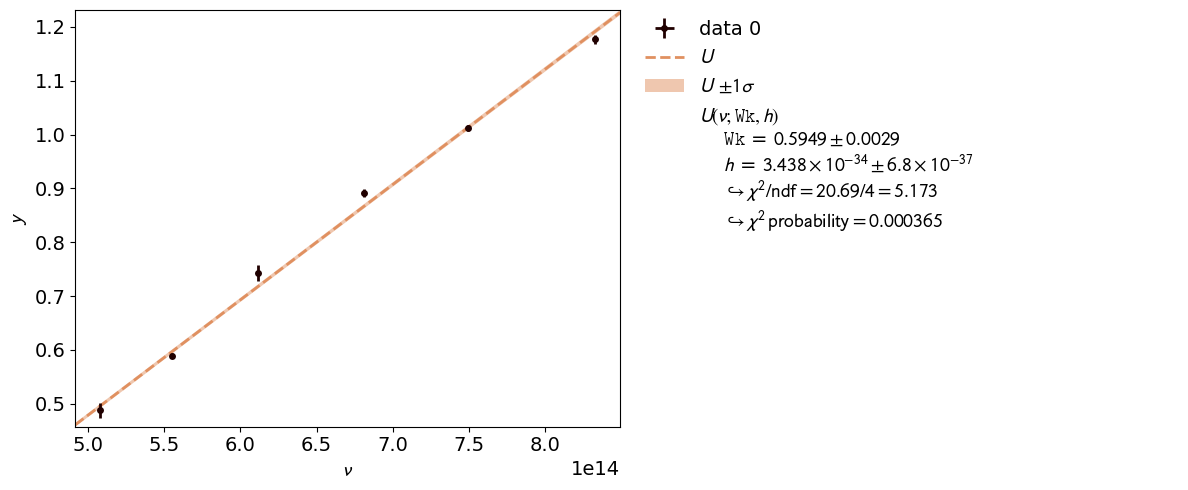

In [91]:
#plt.plot(Uph[:,0],Uph[:,1])

def U(nu,Wk,h):
    return h*nu/const.e - Wk

err_syst= 0

kafe2.xy_fit(U,Uph[:,0],np.mean(Uph[:,1:],axis=1),y_error=np.std(Uph[:,1:],axis=1)+err_syst)
kafe2.plot()

In [92]:
const.h

6.62607015e-34

### Aufgabe 2.2: Photostrom $I_{\mathrm{Ph}}$ als Funktion einer angelegten externen Spannung $U_{o}$ bei variierender Lichtintensität

 - Tragen Sie für $\lambda_{\mathrm{CWL}}=400\,\mathrm{nm}$ den Photostrom $I_{\mathrm{Ph}}$ als Funktion einer angelegten externen Spannung $U_{o}$ auf.
 - Bestimmen Sie durch Anpassung eines geeigneten Modells den Wert von $U(I_{\mathrm{Ph}}=0)$ im Nahbereich des Nulldurchgangs. 
 - Folgen Sie den vorgenannten Punkten einmal für die maximale und einmal für eine bei mittels eines Graufilters reduzierte Lichtintensität. 
 - Bestimmen Sie die Abnahme der Lichtintensität durch den Filter.

---

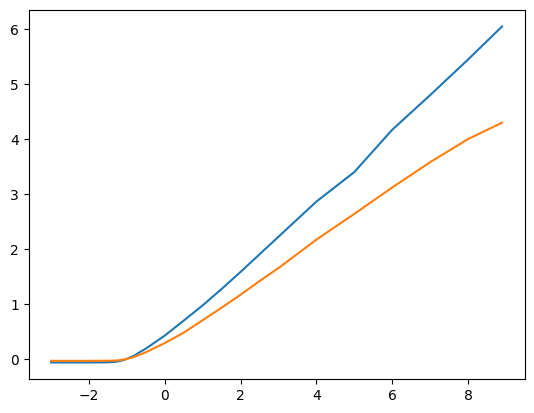

0.17018710096494313

In [119]:
data1 = np.array([[-0.062,-3.00],[-0.063,-2.90],[-0.063,-2.70],[-0.063,-2.60],[-0.063,-2.5],[-0.063,-2.4],[-0.063,-2.3],[-0.063,-2.2],[-0.063,-2.1],[-0.062,-2.0],[-0.062,-1.9],[-0.062,-1.8],[-0.062,-1.7],[-0.061,-1.6],[-0.059,-1.5],[-0.057,-1.4],[-0.050,-1.3],[-0.038,-1.2],[-0.021,-1.1],[0.003,-1.0],[0.034,-0.9],[0.062,-0.8],[0.110,-0.7],[0.149,-0.6],[0.190,-0.5],[0.427,0],[0.700,0.5],[0.977,1],[1.275,1.5],[1.585,2.0],[1.906,2.5],[2.225,3.0],[2.864,4.0],[3.401,5.0],[4.170,6.0],[4.800,7.0],[5.447,8.0],[6.050,8.9]])

data2 = np.array([-0.033]*11+[-0.032]*3+[-0.031,-0.030,-0.028,-0.021,-0.012,0.002,0.019,0.041,0.067,0.094,0.123,0.290,0.481,0.706,0.935,1.170,1.418,1.655,2.172,2.640,3.120,3.580,4.000,4.300])

plt.plot(data1[:,1],data1[:,0])
plt.plot(data1[:,1],data2)
plt.show()


np.mean(abs(data1[15:,0]-data2[15:])/(data1[15:,0]))




### Aufgabe 2.3: Spannung $U_{o}(I_{\mathrm{Ph}}=0)$ bei variierender Lichtfrequenz

 * Bestimmen Sie für die in **Aufgabe 2.1** verwendeten Wellenlängen $\lambda^{(i)}_{\mathrm{CWL}}$ jeweils die Spannung $U^{(i)}(I_{\mathrm{}Ph}=0)$. 
 * Bestimmen Sie $h$ durch Anpassung eines geeigneten Modells und vergleichen Sie mit dem Ergebnis aus **Aufgabe 2.1**.
 
---

/Users/raphaelmutter/miniconda3/lib/python3.11/site-packages/kafe2/fit/_base/fit.py:1048: UserWarning: No data/model errors were specified. Parameter errors cannot be calculated.
  warnings.warn("No data/model errors were specified. Parameter errors cannot be calculated.")


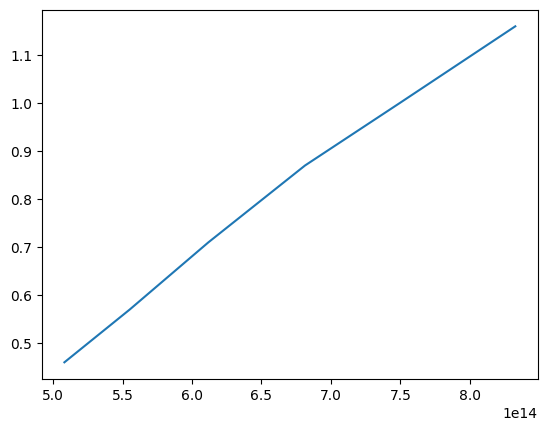

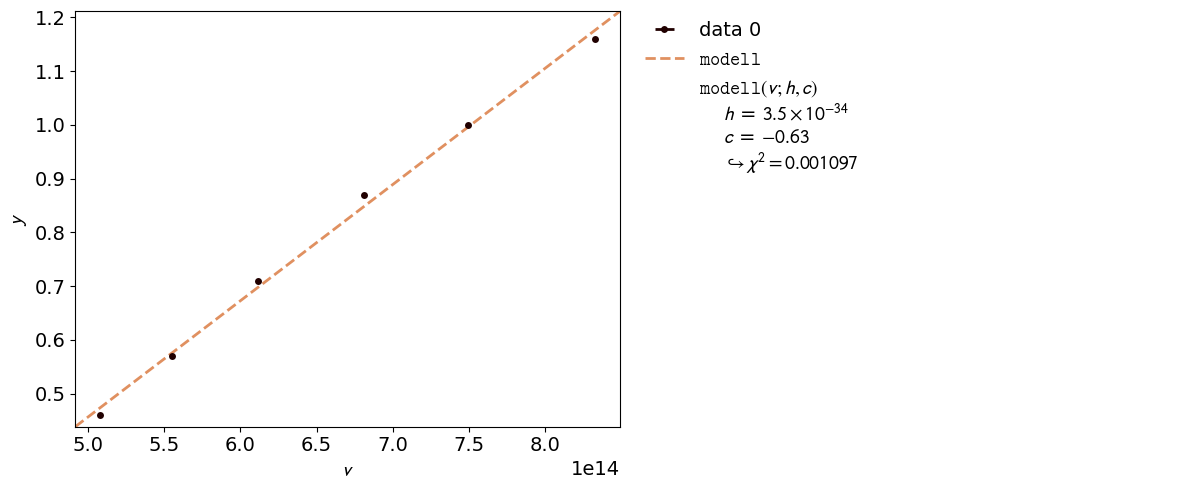

In [125]:
lam = np.array([1.16,1.00,0.87,0.71,0.57,0.46])
plt.plot(Uph[:,0],lam)

def modell(v,h,c):
    return h*v/const.e+c

kafe2.xy_fit(modell,Uph[:,0],lam)
kafe2.plot()

In [126]:
import pandas as pd

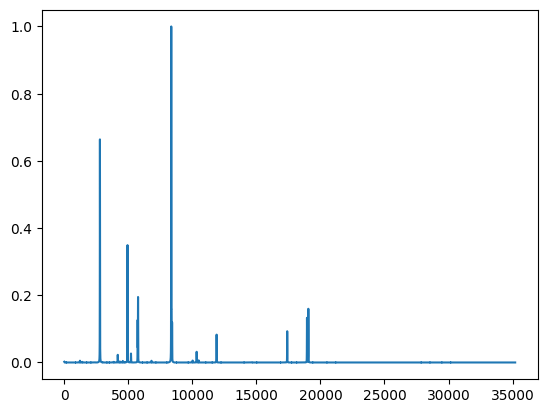

In [146]:
data = pd.read_csv('Hg.csv')
plt.plot(data['intens'])